In [12]:
from functions import *

In [3]:
DF, pL, bP, drugs=read_dataset('data/')

# MIC CHANGE GLOBAL

In [5]:
#GLOBAL MIC CHANGE (FOR CLUSTERMAPS)
L=[]
for sp, dr in itertools.product(pL, drugs):
    DFsp=DF[DF.Species==sp]
    M=mic_change(sp,dr,DFsp)
    if not M: continue
    L.append(M)
MIC=pd.DataFrame.from_records(L, columns=['Species', 'Antibiotic', 'MIC change', 'MIC change error', 'Intercept'])
#WRITE TO FILE
MIC.to_csv('data/mic_change_global.csv', na_rep='NaN', float_format='%.3f', index=False)

Figure: Dynamics of mean MICs. Global mean MICs resolved by PA pair are clustered into pairs of similar change indicative of a global motif of increases and decreases

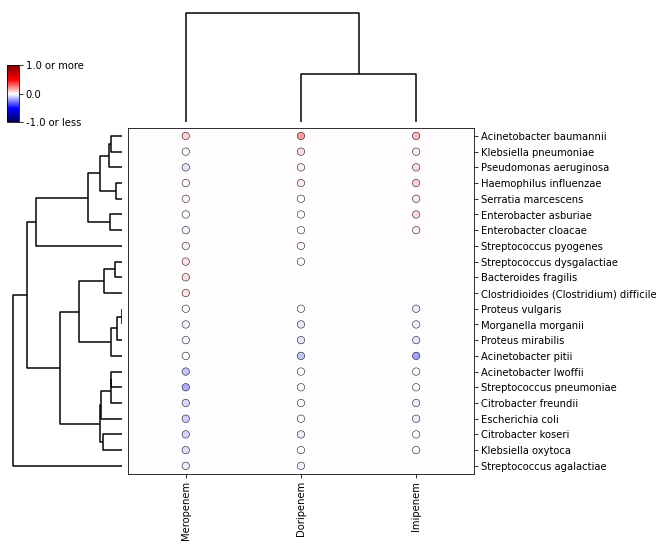

In [10]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
Z,Y1,Y2=clustermap_clustering(X,Y,SC)
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)
fig.savefig('figures/5.MIC_change/clustermap_mic_change.pdf', format='pdf', dpi=1000, bbox_inches = "tight")

Figure: Clinically relevant MIC dynamics. The latter MIC changes are shown for each PA pair on a red (+ve) to blue (-ve) scale in a clustergram on a scale of log2 MIC per year for global data

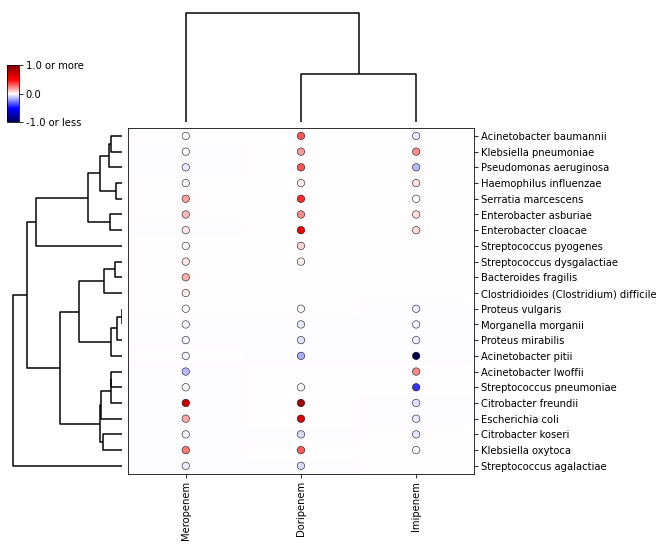

In [8]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
Z,Y1,Y2=clustermap_clustering(X,Y,SC)#we use the data in Fig2B to do the clustering
#NOW READ R CLUSTER TRENDS
DFdata=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['Rtrend']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)
fig.savefig('figures/5.MIC_change/clustermap_mic_change_Rtrend.pdf', format='pdf', dpi=1000, bbox_inches = "tight")

# AVERAGE MIC PER YEAR

In [13]:
L=[]
pC=get_key(DF,'Country')
for country in pC:#for every country
    DFc=DF[DF.Country==country]
    if DFc.empty: continue   
    for sp in pL:#for every pathogen
        DFsp=DFc[DFc.Species==sp]
        if DFsp.empty: continue
        for dr in drugs:#for every drug
            if dr not in bP[sp]: continue
            DFnew=pd.DataFrame({'Year': DFsp['Year'], dr: DFsp[dr]})
            DFnew=DFnew.dropna()
            if DFnew.empty: continue
            yL=get_key(DFnew, 'Year')
            for y in yL:#for every year
                DFy=DFnew[DFnew.Year==y]
                if DFy.empty: continue
                #DATA
                rcases=DFy[DFy[dr]>bP[sp][dr][0]].count()[dr]  
                m=DFy[dr].mean()-bP[sp][dr][0]
                merr=DFy[dr].sem()
                mstd=DFy[dr].std()
                N=len(DFy)
                R=rcases
                F=rcases/N
                #RECORD
                L.append([sp,dr,country,y,m,merr,mstd,N,R,F])
#SAVE ALL IN DATAFRAME AND WRITE TO FILE
MICdf=pd.DataFrame.from_records(L, columns=['Species', 'Antibiotic', 'Country', 'Year', 'Average MIC', 'Average MIC SEM', 'Average MIC SD', 'Number of cases', 'Number of resistant cases', 'Fraction of resistant cases'])
MICdf.to_csv('data/average_mic_per_year.csv', float_format='%.3f', na_rep='NaN', index=False

SyntaxError: unexpected EOF while parsing (<ipython-input-13-151f32e73210>, line 30)

Figure: The global distribution of mean MIC aggregated across all PA pairs

TypeError: 'Polygon' object is not iterable

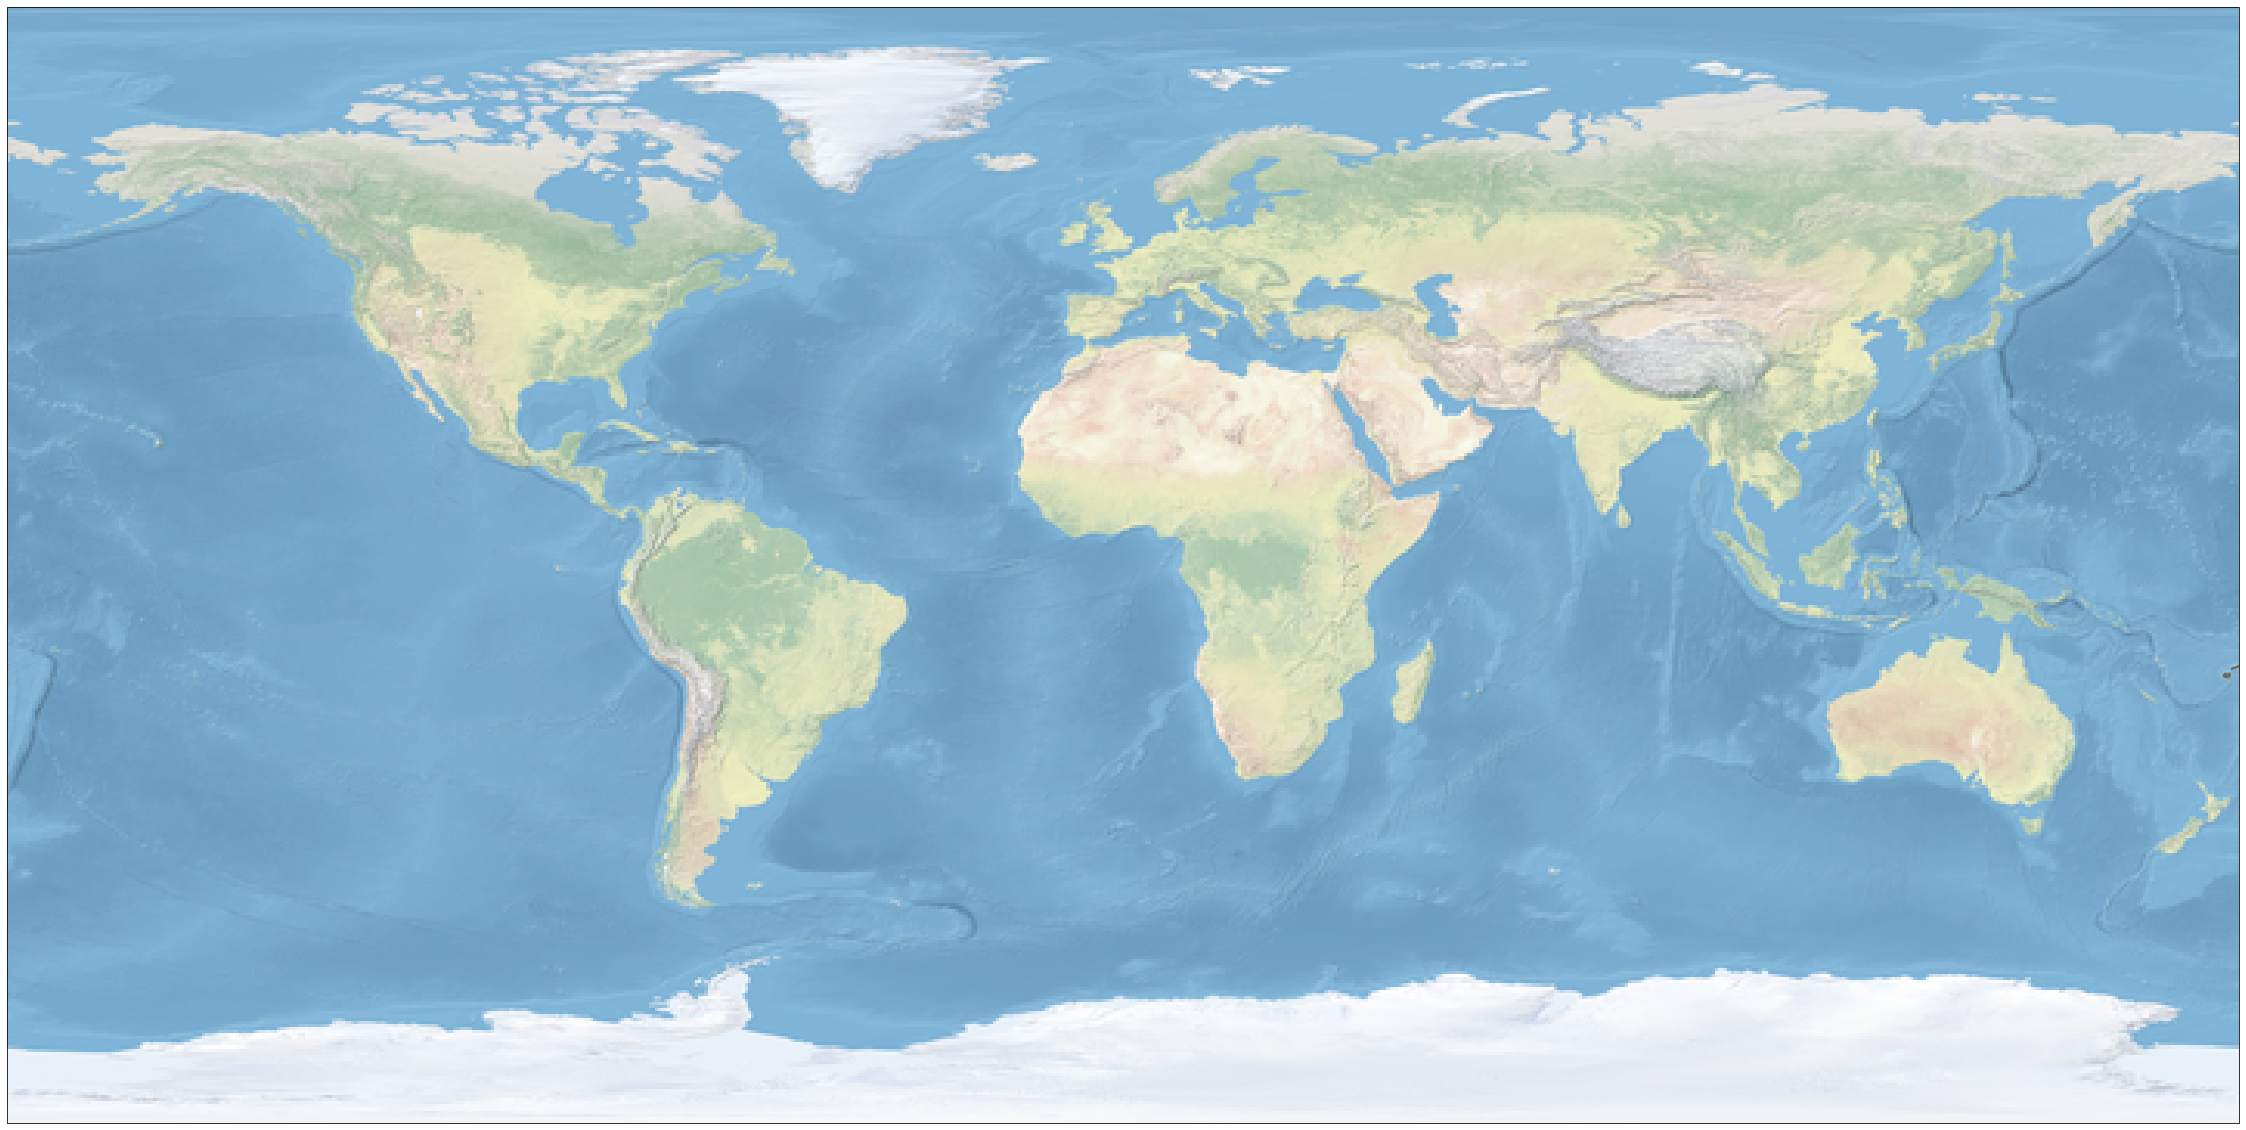

In [10]:
DF=pd.read_csv('data/average_mic_per_year.csv')
pC=get_key(DF,'Country')
Mmin=-4.0
Mmax=0.0
for y in [2005,2015]:
    DFy=DF[DF.Year==y]
    M={}
    for country in pC:
        DFc=DFy[DFy.Country==country]
        m=DFc['Average MIC'].dropna()
        if m.empty: continue
        M[country]=m.mean()
    fig,ax=worldmaps(M,y,Mmin,Mmax)

# Exemplar determinations of S and R cluster pairs and their dynamics

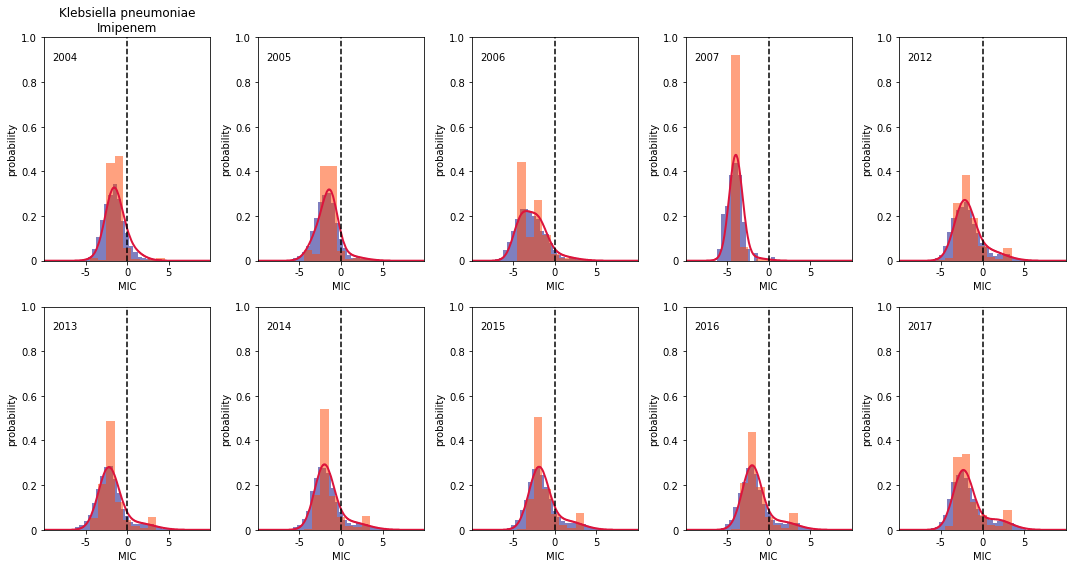

In [14]:
sp='Klebsiella pneumoniae'
dr='Imipenem'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

# Time derivatives of the mean MIC of R for 3 carbapenems and a selected specie

/Users/carmen/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/carmen/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/carmen/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


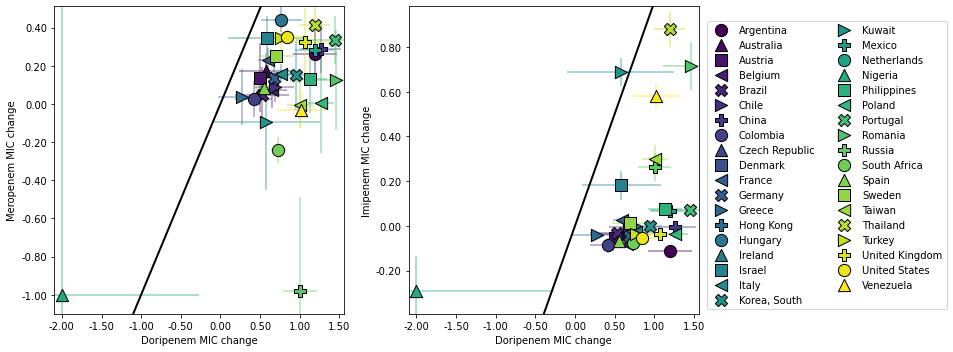

In [17]:
sp='Escherichia coli'
dr1='Doripenem'
dr2='Meropenem'
dr3='Imipenem'
RDori=pd.read_csv('results/Rcluster/'+sp+'_'+dr1+'_Rcluster.csv')
RMero=pd.read_csv('results/Rcluster/'+sp+'_'+dr2+'_Rcluster.csv')
RImi=pd.read_csv('results/Rcluster/'+sp+'_'+dr3+'_Rcluster.csv')
pC1=get_key(RDori,'Country')
pC2=get_key(RMero,'Country')
pC3=get_key(RImi,'Country')
pC=[]
for country in pC1:
    if country in pC2 and country in pC3:
        pC.append(country)
pC=sorted(pC)
vals=np.linspace(0,1,len(pC))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
#SYMBOLS AND COLORS FOR EACH COUNTRY
LS=['o', '^', 's', '<', 'X', '>', 'P']
LM={}
LC={}
LA={}
for count, dr in enumerate(pC):
    LM[dr]=LS[count%len(LS)]
    LC[dr]=cmap(count/len(pC))

fig=plt.figure(figsize=(10,5))
handles=[]
labels=[]

#DORI VS MERO
L=[]
ax=fig.add_subplot(1,2,1)
maxx=-1
maxy=-1
minx=1
miny=1
for country in pC:
    R1=RDori[RDori.Country==country]
    R2=RMero[RMero.Country==country]
    if R1.empty or R2.empty: continue
    #DORI TREND
    x1=R1['Year'].tolist()
    y1=R1['MIC'].tolist()
    s1,i1,r1,p1,std1=stats.linregress(x1,y1)
    if True:#p1<0.05:
        x=s1
        xerr=std1
    else:
        x=0.0
        xerr=0.0
    #MERO TREND
    x2=R2['Year'].tolist()
    y2=R2['MIC'].tolist()
    s2,i2,r2,p2,std2=stats.linregress(x2,y2)
    if True:#p2<0.05:
        y=s2
        yerr=std2
    else:
        y=0.0
        yerr=0.0
    maxx=max(x,maxx)
    minx=min(x,minx)
    maxy=max(y,maxy)
    miny=min(y,miny)
    ax.scatter(x,y,edgecolors='black',color=LC[country],marker=LM[country], 
               s=150, zorder=2, label=country)
    ax.errorbar(x,y,fmt='o',color=LC[country],markersize=0, 
                xerr=xerr,yerr=yerr, zorder=1, alpha=0.5)
#LABELS
ax.set_xlabel('Doripenem MIC change')
ax.set_ylabel('Meropenem MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
yp=np.linspace(-40,40,100)
xp=[0 for z in yp]
ax.plot(yp,yp, '-k', linewidth=2)
ax.set_ylim([miny-0.1,maxy+0.1])
ax.set_xlim([minx-0.1,maxx+0.1])
handles1, labels1 = ax.get_legend_handles_labels()
handles+=handles1
labels+=labels1

#DORI VS IMI
ax=fig.add_subplot(1,2,2)
maxx=-1
maxy=-1
minx=1
miny=1
for country in pC:
    R1=RDori[RDori.Country==country]
    R2=RImi[RImi.Country==country]
    if R1.empty or R2.empty: continue
    #DORI TREND
    Y1=get_key(R1,'Year')
    if len(Y1)<2: continue
    x1=R1['Year'].tolist()
    y1=R1['MIC'].tolist()
    s1,i1,r1,p1,std1=stats.linregress(x1,y1)
    if True:#p1<0.05:
        x=s1
        xerr=std1
    else:
        x=0.0
        xerr=0.0
    #IMI TREND
    Y2=get_key(R2,'Year')
    if len(Y2)<2: continue
    x2=R2['Year'].tolist()
    y2=R2['MIC'].tolist()
    s2,i2,r2,p2,std2=stats.linregress(x2,y2)
    if True:#p2<0.05:
        y=s2
        yerr=std2
    else:
        y=0.0
        yerr=0.0
    maxx=max(x,maxx)
    minx=min(x,minx)
    maxy=max(y,maxy)
    miny=min(y,miny)
        # print(sp,country,len(R1),len(R2),s1,p1,s2,p2)
        # L.append([x,y,country])
    ax.scatter(x,y,edgecolors='black',color=LC[country],marker=LM[country], 
               s=150, zorder=2, label=country)
    ax.errorbar(x,y,fmt='o',color=LC[country],markersize=0, 
                xerr=xerr,yerr=yerr, zorder=1, alpha=0.5)
#LABELS
ax.set_xlabel('Doripenem MIC change')
ax.set_ylabel('Imipenem MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
yp=np.linspace(-40,40,100)
xp=[0 for z in yp]
ax.plot(yp,yp, '-k', linewidth=2)
ax.set_ylim([miny-0.1,maxy+0.1])
ax.set_xlim([minx-0.1,maxx+0.1])
handles1, labels1 = ax.get_legend_handles_labels()
handles+=handles1
labels+=labels1
#ORGANIZE LABELS
H=[0 for z in pC]
L=[z for z in pC]
for h,l in zip(handles,labels):
    index1=L.index(l)
    H[index1]=h
fig.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.0, 0.3, 0.3],
          bbox_transform=ax.transAxes, ncol=2)
fig.tight_layout()